## Data Initialization

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
# Discount factor
gamma = 0.9

In [4]:
# Termination condition
termination = 1e-6

In [5]:
# Define instant rewards
R = {
    ('V1', 'Facebook'): -1,
    ('V1', 'Quit'): 0,
    ('V2', 'Facebook'): -1,
    ('V2', 'Study'): -2,
    ('V3', 'Sleep'): 0,
    ('V3', 'Study'): -2,
    ('V4', 'Pub'): 1,
    ('V4', 'Study'): 10,
    ('V5', '.'): 0  # Termination state
}

In [6]:
# Initializes the Q value, setting the initial value of all states to 0
Q = {
    ('V1', 'Facebook'): 0,
    ('V1', 'Quit'): 0,
    ('V2', 'Facebook'): 0,
    ('V2', 'Study'): 0,
    ('V3', 'Sleep'): 0,
    ('V3', 'Study'): 0,
    ('V4', 'Pub'): 0,
    ('V4', 'Study'): 0,
    ('V5', '.'): 0  # Termination state
}

## Iteration Algorithm

In [7]:
def iteration_algorithm(Q, R, gamma, termination):
    iteration = 0
    Q_record = []
    while True:
        delta = 0
        Q_old = Q.copy()
        Q_record.append(Q_old)

        # Bellman equation, calculating action Q
        Q[('V1', 'Facebook')] = R[('V1', 'Facebook')] + gamma * (0.5 * Q_old[('V1', 'Facebook')] + 0.5 * Q_old[('V1', 'Quit')])
        Q[('V1', 'Quit')] = R[('V1', 'Quit')] + gamma * (0.5 * Q_old[('V2', 'Facebook')] + 0.5 * Q_old[('V2', 'Study')])

        Q[('V2', 'Facebook')] = R[('V2', 'Facebook')] + gamma * (0.5 * Q_old[('V1', 'Facebook')] + 0.5 * Q_old[('V1', 'Quit')])
        Q[('V2', 'Study')] = R[('V2', 'Study')] + gamma * (0.5 * Q_old[('V3', 'Sleep')] + 0.5 * Q_old[('V3', 'Study')])

        Q[('V3', 'Sleep')] = R[('V3', 'Sleep')] + gamma * Q_old[('V5', '.')]
        Q[('V3', 'Study')] = R[('V3', 'Study')] + gamma * (0.5 * Q_old[('V4', 'Pub')] + 0.5 * Q_old[('V4', 'Study')])

        Q[('V4', 'Pub')] = R[('V4', 'Pub')] + gamma * (0.2 * (0.5 * Q_old[('V2', 'Facebook')] + 0.5 * Q_old[('V2', 'Study')]) +
                                                       0.4 * (0.5 * Q_old[('V3', 'Sleep')] + 0.5 * Q_old[('V3', 'Study')]) +
                                                       0.4 * (0.5 * Q_old[('V4', 'Pub')] + 0.5 * Q_old[('V4', 'Study')]))
        Q[('V4', 'Study')] = R[('V4', 'Study')] + gamma * Q_old[('V5', '.')]

        Q[('V5', '.')] = 0

        # Calculate the change in Q value delta
        delta = max(delta, max(abs(Q[state_action] - Q_old[state_action]) for state_action in Q))

        iteration += 1
        print(f'Iteration {iteration}: {Q}')

        # Check whether the termination condition has been met
        if delta < termination:
            Q_record.append(Q)
            break

    return Q, iteration, Q_record

## Result

In [8]:
Q, iterations, Q_record = iteration_algorithm(Q, R, gamma, termination)

print('\nFinal Q:')
for action, value in Q.items():
    print(f'Q{action} = {value}')
print(f'\nTotal iterations: {iterations}')

Iteration 1: {('V1', 'Facebook'): -1.0, ('V1', 'Quit'): 0.0, ('V2', 'Facebook'): -1.0, ('V2', 'Study'): -2.0, ('V3', 'Sleep'): 0.0, ('V3', 'Study'): -2.0, ('V4', 'Pub'): 1.0, ('V4', 'Study'): 10.0, ('V5', '.'): 0}
Iteration 2: {('V1', 'Facebook'): -1.45, ('V1', 'Quit'): -1.35, ('V2', 'Facebook'): -1.45, ('V2', 'Study'): -2.9, ('V3', 'Sleep'): 0.0, ('V3', 'Study'): 2.95, ('V4', 'Pub'): 2.35, ('V4', 'Study'): 10.0, ('V5', '.'): 0}
Iteration 3: {('V1', 'Facebook'): -2.26, ('V1', 'Quit'): -1.9574999999999998, ('V2', 'Facebook'): -2.26, ('V2', 'Study'): -0.6724999999999999, ('V3', 'Sleep'): 0.0, ('V3', 'Study'): 3.5575, ('V4', 'Pub'): 3.3625000000000003, ('V4', 'Study'): 10.0, ('V5', '.'): 0}
Iteration 4: {('V1', 'Facebook'): -2.897875, ('V1', 'Quit'): -1.3196249999999998, ('V2', 'Facebook'): -2.897875, ('V2', 'Study'): -0.39912499999999995, ('V3', 'Sleep'): 0.0, ('V3', 'Study'): 4.0131250000000005, ('V4', 'Pub'): 3.7816750000000003, ('V4', 'Study'): 10.0, ('V5', '.'): 0}
Iteration 5: {('V1

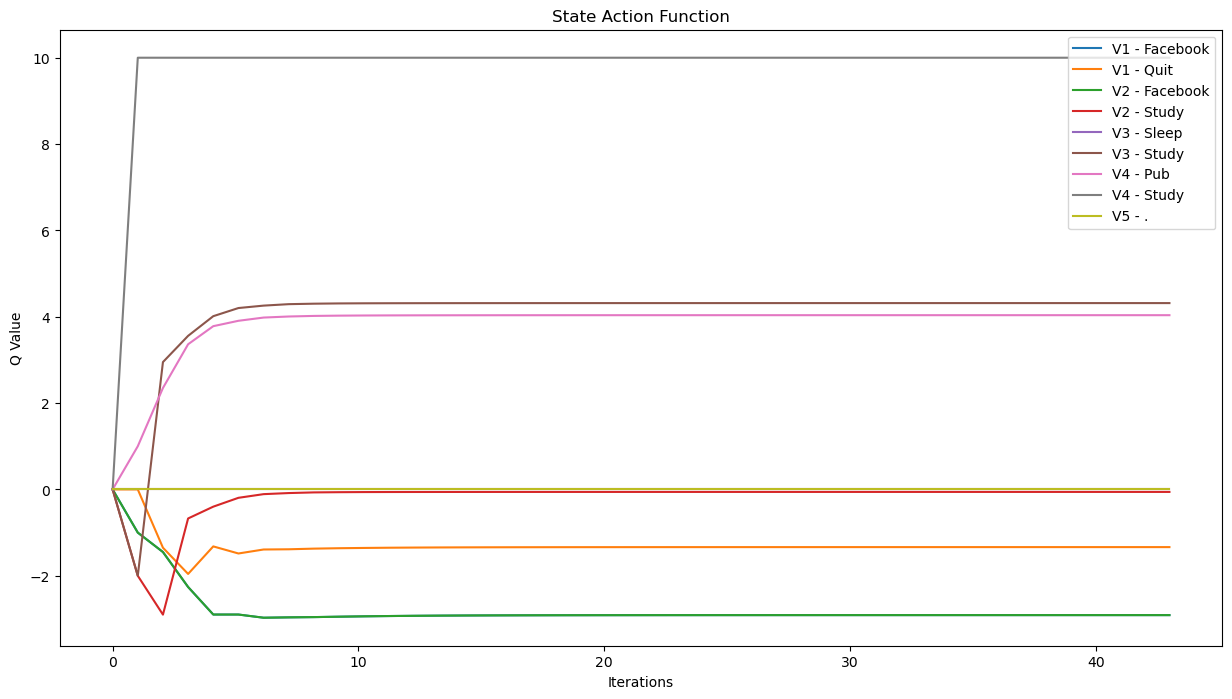

In [11]:
Q_v1_facebook = [item[('V1', 'Facebook')] for item in Q_record]
Q_v1_quit = [item[('V1', 'Quit')] for item in Q_record]
Q_v2_facebook = [item[('V2', 'Facebook')] for item in Q_record]
Q_v2_study = [item[('V2', 'Study')] for item in Q_record]
Q_v3_sleep = [item[('V3', 'Sleep')] for item in Q_record]
Q_v3_study = [item[('V3', 'Study')] for item in Q_record]
Q_v4_pub = [item[('V4', 'Pub')] for item in Q_record]
Q_v4_study = [item[('V4', 'Study')] for item in Q_record]
Q_v5 = [item[('V5', '.')] for item in Q_record]

x = np.linspace(0, iterations + 1, iterations + 1)

plt.figure(figsize=(15, 8))
plt.plot(x, Q_v1_facebook, label='V1 - Facebook')
plt.plot(x, Q_v1_quit, label='V1 - Quit')
plt.plot(x, Q_v2_facebook, label='V2 - Facebook')
plt.plot(x, Q_v2_study, label='V2 - Study')
plt.plot(x, Q_v3_sleep, label='V3 - Sleep')
plt.plot(x, Q_v3_study, label='V3 - Study')
plt.plot(x, Q_v4_pub, label='V4 - Pub')
plt.plot(x, Q_v4_study, label='V4 - Study')
plt.plot(x, Q_v5, label='V5 - .')

plt.title('State Action Function')
plt.xlabel('Iterations')
plt.ylabel('Q Value')

plt.legend(loc='upper right')
plt.show()